In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation
from itertools import combinations




In [3]:
df = pd.read_excel('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/VEPTask/Results/AllSub_results_GenSight.xlsx')
df

,Subjid,Group,Task,GogglesCondition,HasOffData,Stimuli,ElecGroup,FreqGroup,Accuracy
0,4006,GenSight Patient,VEP,GogglesON,Yes,Control,All_electrodes,1to40,27.777778
1,4006,GenSight Patient,VEP,GogglesON,Yes,Disc,All_electrodes,1to40,27.777778
2,4006,GenSight Patient,VEP,GogglesON,Yes,VerticalBar,All_electrodes,1to40,27.777778
3,4006,GenSight Patient,VEP,GogglesON,Yes,HorizontalBar,All_electrodes,1to40,33.333333
4,4006,GenSight Patient,VEP,GogglesON,Yes,All,All_electrodes,1to40,29.166667
...,...,...,...,...,...,...,...,...,...
60,1004,GenSight Patient,VEP,GogglesOFF,Yes,Control,All_electrodes,1to40,17.777778
61,1004,GenSight Patient,VEP,GogglesOFF,Yes,Disc,All_electrodes,1to40,2.500000
62,1004,GenSight Patient,VEP,GogglesOFF,Yes,VerticalBar,All_electrodes,1to40,24.444444
63,1004,GenSight Patient,VEP,GogglesOFF,Yes,HorizontalBar,All_electrodes,1to40,11.363636


In [4]:
df = df.groupby(['Subjid','GogglesCondition','HasOffData','Stimuli','ElecGroup','FreqGroup']).mean().reset_index()
df

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_95707/2237994097.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Subjid','GogglesCondition','HasOffData','Stimuli','ElecGroup','FreqGroup']).mean().reset_index()


,Subjid,GogglesCondition,HasOffData,Stimuli,ElecGroup,FreqGroup,Accuracy
0,1001,GogglesOFF,Yes,All,All_electrodes,1to40,25.000000
1,1001,GogglesOFF,Yes,Control,All_electrodes,1to40,16.666667
2,1001,GogglesOFF,Yes,Disc,All_electrodes,1to40,27.777778
3,1001,GogglesOFF,Yes,HorizontalBar,All_electrodes,1to40,33.333333
4,1001,GogglesOFF,Yes,VerticalBar,All_electrodes,1to40,22.222222
5,1001,GogglesON,Yes,All,All_electrodes,1to40,36.666667
6,1001,GogglesON,Yes,Control,All_electrodes,1to40,64.444444
7,1001,GogglesON,Yes,Disc,All_electrodes,1to40,31.111111
8,1001,GogglesON,Yes,HorizontalBar,All_electrodes,1to40,24.444444
9,1001,GogglesON,Yes,VerticalBar,All_electrodes,1to40,26.666667


In [75]:
df.dtypes

Subjid                int64
GogglesCondition     object
HasOffData           object
Stimuli              object
ElecGroup            object
FreqGroup            object
Accuracy            float64
dtype: object

In [483]:
unique_subjects

array([1001, 1002, 1004, 4006, 4010])

p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
appr. sig: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

GogglesOFF v.s. GogglesON: t-test paired samples, P_val=3.647e-03 stat=-5.038e+00
One-sample t-test for GogglesON: t-statistic = 2.152750974173721, p-value = 0.048839849144197624
One-sample t-test for GogglesOFF: t-statistic = -2.1989665406377674, p-value = 0.9536202548252865


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


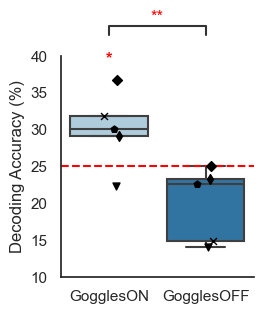

In [482]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from statannot import add_stat_annotation

# Filter the data
data = df[(df['Stimuli'] == 'All') & (df['HasOffData'] == 'Yes')]

# Define markers for unique subjects
unique_subjects = data['Subjid'].unique()
markers = ['D', 'x', 'v', 'd', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

# Create a box plot
g = sns.catplot(
    data=data, kind='box', showfliers=False,
    y='Accuracy', x='GogglesCondition', order=['GogglesON', 'GogglesOFF'],
    palette='Paired', height=4, aspect=0.7
)

# Add individual subject markers
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='Accuracy', x='GogglesCondition', order=['GogglesON', 'GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True
    )

# Define group pairs for statistical comparison
group_pairs = [
    (('GogglesON'), ('GogglesOFF'))
]

# Add statistical annotations
add_stat_annotation(
    g.ax, data=data, x='GogglesCondition', y='Accuracy',
    box_pairs=group_pairs, test='t-test_paired', text_format='star',
    loc='outside', verbose=2, comparisons_correction=None, 
    pvalue_thresholds=[(1, "ns"), (0.1, "appr. sig"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
    stats_params={'alternative': 'less'},
    line_offset_to_box=0.2,  # Adjust this value to move the bar higher
    line_height=0.05 
)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['*', '**', '***']):
        text.set_color('red')

# Perform one-sample t-tests against the value 25 for each condition and annotate the plot
conditions = ['GogglesON', 'GogglesOFF']
for i, condition in enumerate(conditions):
    subset = data[data['GogglesCondition'] == condition]['Accuracy']
    t_stat, p_val = ttest_1samp(subset, 25, alternative='greater')
    
    # Determine significance level for annotation
    if p_val < 0.001:
        star = '***'
    elif p_val < 0.01:
        star = '**'
    elif p_val < 0.05:
        star = '*'
    else:
        star = ''
    
    # Print test result
    print(f"One-sample t-test for {condition}: t-statistic = {t_stat}, p-value = {p_val}")
    
    # Annotate the plot with the results
    g.ax.text(
        i, 39 - i * 2, f"{star}", horizontalalignment='center', color='red', fontsize=12, fontweight='bold'
    )

# Add reference line and labels
g.refline(y=25, color='red')
g.set_ylabels('Decoding Accuracy (%)', fontsize=12)
g.set_xlabels('')
plt.ylim([10,40])

plt.show()


In [12]:
ttest_1samp(data[data['GogglesCondition']=='GogglesON/12Hz']['Accuracy'],25)

/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


TtestResult(statistic=nan, pvalue=nan, df=-1)

In [13]:
ttest_rel(data[data['GogglesCondition']=='GogglesON']['Accuracy'],data[data['GogglesCondition']=='GogglesOFF']['Accuracy'])

TtestResult(statistic=4.1785404794160215, pvalue=0.024968276607046837, df=3)

One-sample t-test for GogglesON: t-statistic = 2.152750974173721, p-value = 0.048839849144197624


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


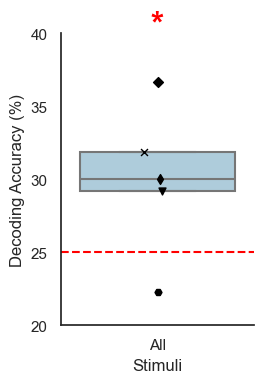

In [249]:
plt.close()
sns.set_theme(style="white",palette='Paired')

data=df[(df['Stimuli']=='All') & (df['GogglesCondition']=='GogglesON')]

unique_subjects = data['Subjid'].unique()
markers = ['D', 'x', 'H','v', 'd', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']

subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

g = sns.catplot(data=data,kind='box',showfliers=False,
            y='Accuracy',
            palette='Paired',
            height=4, aspect=.7)


# Overlay each subject with its custom marker
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='Accuracy', x='Stimuli',
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True, ax=g.ax
    )


t_stat, p_val = ttest_1samp(data['Accuracy'], 25, alternative='greater')
# Determine significance level for annotation
if p_val < 0.001:
    star = '***'
elif p_val < 0.01:
    star = '**'
elif p_val < 0.05:
    star = '*'
elif p_val < 0.1:
    star = '+'

print(f"One-sample t-test for {'GogglesON'}: t-statistic = {t_stat}, p-value = {p_val}")

# Annotate the plot with the results
g.ax.text(
    0, 42 - 1 * 2, f"{star}", horizontalalignment='center', color='red', fontsize=24, fontweight='bold'
)

g.set(ylim=[20,40])
g.set(yticks=[20,25,30,35,40])
g.refline(y=25,color='red')
g.set_ylabels('Decoding Accuracy (%)',fontsize=12)
plt.show()

In [16]:
data.std()

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_79544/2723740006.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


Subjid      1646.272395
Accuracy       5.196136
dtype: float64

In [17]:
ttest_1samp(data['Accuracy'],25)

TtestResult(statistic=2.152750974173721, pvalue=0.09767969828839525, df=4)

/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1154: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_81446/1188710207.py:40: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)


p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
appr. sig (p<0.1): 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Disc_GogglesOFF v.s. Disc_GogglesON: t-test paired samples with Bonferroni correction, P_val=2.985e-02 stat=-4.094e+00
Control_GogglesOFF v.s. Control_GogglesON: t-test paired samples with Bonferroni correction, P_val=1.948e-01 stat=-2.155e+00
HorizontalBar_GogglesOFF v.s. HorizontalBar_GogglesON: t-test paired samples with Bonferroni correction, P_val=5.916e-01 stat=-1.202e+00
VerticalBar_GogglesOFF v.s. VerticalBar_GogglesON: t-test paired samples with Bonferroni correction, P_val=6.943e-01 stat=-1.064e+00
One-sample t-test for Control with GogglesON: t-statistic = 1.1187961268101636, p-value = 0.16293736039408485
One-sample t-test for Control with GogglesOFF: t-statistic = -3.052677907642102, p-value = 0.98103559739019
One-sample t-test for Disc with GogglesON: t-statistic = 1.1667003907172244, p-value = 0.15

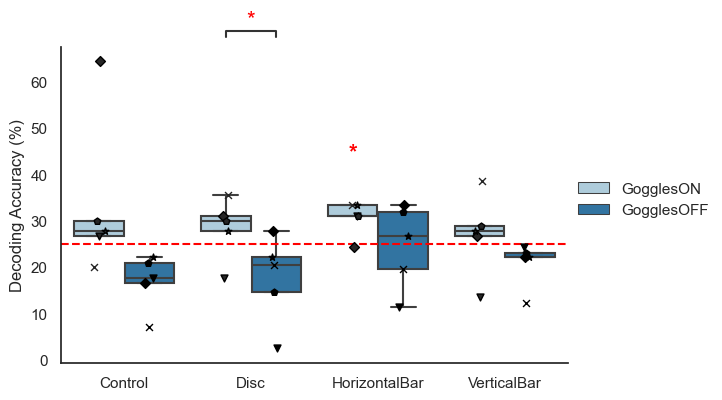

In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

# Assuming df is your DataFrame and it is already defined
data = df[(df['Stimuli'] != 'All') & (df['HasOffData'] == 'Yes')]

# Close any existing plots to prevent overlap
plt.close()

# Create the boxplot
g = sns.catplot(
    data=data, kind='box', showfliers=False,
    y='Accuracy', x='Stimuli',
    order=['Control', 'Disc', 'HorizontalBar', 'VerticalBar'],
    hue='GogglesCondition', hue_order=['GogglesON', 'GogglesOFF'],
    palette='Paired',
    height=4, aspect=1.5
)

# Define custom markers for each subject
unique_subjects = data['Subjid'].unique()
markers = ['D', 'x', 'v', '*', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

# Overlay each subject with its custom marker
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='Accuracy', x='Stimuli',
        order=['Control', 'Disc', 'HorizontalBar', 'VerticalBar'],
        hue='GogglesCondition', hue_order=['GogglesON', 'GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True, ax=g.ax
    )

# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Define pairs for statistical comparison
pairs = [
    (('Control', 'GogglesON'), ('Control', 'GogglesOFF')),
    (('Disc', 'GogglesON'), ('Disc', 'GogglesOFF')),
    (('VerticalBar', 'GogglesON'), ('VerticalBar', 'GogglesOFF')),
    (('HorizontalBar', 'GogglesON'), ('HorizontalBar', 'GogglesOFF'))
]

pairs = [
    (('Control', 'GogglesON'), ('Control', 'GogglesOFF')),
    (('Disc', 'GogglesON'), ('Disc', 'GogglesOFF')),
    (('VerticalBar', 'GogglesON'), ('VerticalBar', 'GogglesOFF')),
    (('HorizontalBar', 'GogglesON'), ('HorizontalBar', 'GogglesOFF')),
]

# Add statistical annotations using one-tailed t-tests
add_stat_annotation(
    g.ax, data=data, x='Stimuli', y='Accuracy', hue='GogglesCondition',
    box_pairs=pairs,
    test='t-test_paired', text_format='star', loc='outside', verbose=2,
    pvalue_thresholds=[(1, "ns"),(0.1,"appr. sig (p<0.1)"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
    stats_params={'alternative': 'less'}
)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['*','**','(***)']):
        text.set_color('red')
        text.set_fontsize(16)

for text in g.ax.texts:
    if text.get_text() == 'ns':  # Check if the annotation is 'ns'
        x, y = text.get_position()  # Get the position of the text annotation
        text.set_visible(False)  # Hide the 'ns' text

        # Find the corresponding line (bracket) based on its y-position
for line in g.ax.lines:
    y = line.get_ydata()
    x = line.get_xdata()
    if y[0] > 60 and (x[0] > 1 or x[0] < 0.5): # Match the y-coordinate of the annotation to the bracket
        line.set_visible(False)

# Perform one-sample t-tests against the value 25 for each condition and annotate the plot
conditions = data['Stimuli'].unique()
goggles_conditions = ['GogglesON', 'GogglesOFF']

for i, condition in enumerate(conditions):
    for j, goggles in enumerate(goggles_conditions):
        subset = data[(data['Stimuli'] == condition) & (data['GogglesCondition'] == goggles)]['Accuracy']
        t_stat, p_val = ttest_1samp(subset, 25, alternative='greater')
        
        # Determine significance level for annotation
        if p_val < 0.001:
            star = '***'
        elif p_val < 0.01:
            star = '**'
        elif p_val < 0.05:
            star = '*'
        elif p_val < 0.1:
            star = '+'
        else:
            star = 'ns'  # No annotation for non-significant results
        
        # Print test result
        print(f"One-sample t-test for {condition} with {goggles}: t-statistic = {t_stat}, p-value = {p_val}")
        
        # Annotate the plot with the results
        if star != 'ns':  # Only annotate if there is a significant result
            g.ax.text(
                i-0.2, subset.max() + 10, f"{star}", horizontalalignment='center', color='red', fontsize=16, fontweight='bold'
            )


# Customize plot
sns.move_legend(g, "center right")
g._legend.set_title('')
plt.ylabel('Decoding Accuracy (%)', fontsize=12)
plt.xlabel('')
plt.axhline(y=25, color='red', linestyle='--')
plt.show()


In [371]:
data[(data['Stimuli']!='HorizontalBar')&(data['GogglesCondition']=='GogglesON')].std()

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_81446/3293803167.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[(data['Stimuli']!='HorizontalBar')&(data['GogglesCondition']=='GogglesON')].std()


Subjid      1524.152073
Accuracy      11.488534
dtype: float64

/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


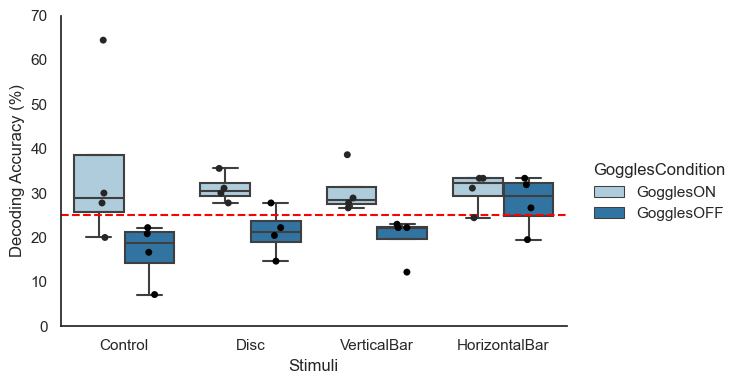

In [27]:
data=df[(df['Stimuli']!='All') & (df['HasOffData']=='Yes')]
g = sns.catplot(data=data,kind='box',showfliers=False,
            y='Accuracy',x='Stimuli',                
            order=['Control','Disc','VerticalBar','HorizontalBar'],
            hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            #errorbar=None,
            palette='Paired',
            height=4, aspect=1.5)
g.map_dataframe(sns.stripplot,
            y='Accuracy',x='Stimuli',
            order=['Control','Disc','VerticalBar','HorizontalBar'],
            hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            color='k',dodge=True)
g.set(ylim=[0,70])
g.refline(y=25,color='red')
g.set_ylabels('Decoding Accuracy (%)',fontsize=12)
plt.show()

In [30]:
ttest_1samp(data[(data['GogglesCondition']=='GogglesON')&(data['Stimuli']=='VerticalBar')]['Accuracy'],25)

TtestResult(statistic=1.9955878148675896, pvalue=0.13992320347071427, df=3)

In [31]:
ttest_ind(data[(data['GogglesCondition']=='GogglesON')&(data['Stimuli']=='Control')]['Accuracy'],
          data[(data['GogglesCondition']=='GogglesOFF')&(data['Stimuli']=='Control')]['Accuracy'])

TtestResult(statistic=1.8052910443966206, pvalue=0.12106203546194055, df=6.0)

One-sample t-test for Control: t-statistic = 1.1187961268101636, p-value = 0.16293736039408485
One-sample t-test for Disc: t-statistic = 1.1667003907172244, p-value = 0.15407210094505228
One-sample t-test for HorizontalBar: t-statistic = 3.4701104689428353, p-value = 0.01279052257501797
One-sample t-test for VerticalBar: t-statistic = 0.5317989707143366, p-value = 0.31151439021324945


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_79544/4284582974.py:29: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


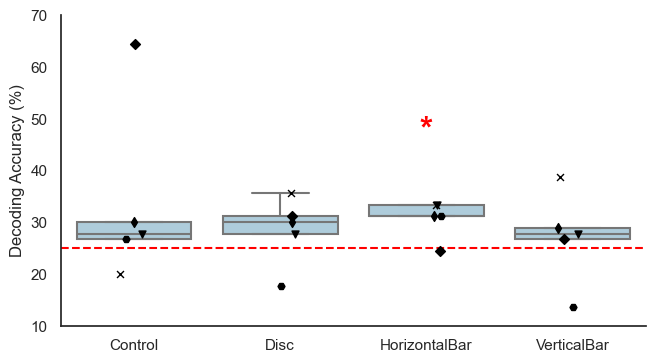

In [32]:
data=df[(df['Stimuli']!='All') & (df['GogglesCondition']=='GogglesON')]

# Close any existing plots to prevent overlap
plt.close()
g = sns.catplot(data=data,kind='box',showfliers=False,
            y='Accuracy',x='Stimuli',                
            order=['Control','Disc','HorizontalBar','VerticalBar'],
            hue='GogglesCondition',
            palette='Paired',height=4, aspect=1.7)


unique_subjects = data['Subjid'].unique()
markers = ['D', 'x', 'H','v', 'd', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']

subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

# Overlay each subject with its custom marker
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='Accuracy', x='Stimuli',
        order=['Control', 'Disc', 'HorizontalBar', 'VerticalBar'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True, ax=g.ax
    )

# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)


# Perform one-sample t-test for each stimulus type
conditions = ['Control','Disc','HorizontalBar','VerticalBar']
for i, condition in enumerate(conditions):
    subset = data[data['Stimuli'] == condition]['Accuracy']
    t_stat, p_val = ttest_1samp(subset, 25, alternative='greater')
    
    # Determine significance level for annotation
    if p_val < 0.001:
        star = '***'
    elif p_val < 0.01:
        star = '**'
    elif p_val < 0.05:
        star = '*'
    else:
        star = ''
    
    # Print test result
    print(f"One-sample t-test for {condition}: t-statistic = {t_stat}, p-value = {p_val}")
    
    # Annotate the plot with the results
    g.ax.text(
        i, 50 - i * 2, f"{star}", horizontalalignment='center', color='red', fontsize=24, fontweight='bold'
    )
g.set(ylim=[10,70])
g.refline(y=25,color='red')
g.set_ylabels('Decoding Accuracy (%)',fontsize=12)
g.set_xlabels('')
g._legend.remove()
plt.show()

In [24]:
data[data['Stimuli']=='HorizontalBar'].std()

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_28907/3823023606.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[data['Stimuli']=='HorizontalBar'].std()


Subjid      1646.272395
Accuracy       3.651484
dtype: float64

In [59]:
ttest_1samp(data[data['Stimuli']=='VerticalBar']['Accuracy'],25)

TtestResult(statistic=0.5317989707143366, pvalue=0.6230287804264989, df=4)

In [7]:
df = pd.read_excel('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/VEPTask/Results/AllSub_results_allgroups.xlsx')
df


,Subjid,SubjectType,Task,ElecGroup,GogglesCondition,Condition,HasOffData,FreqGroup,Stimuli,Accuracy
0,4006,GenSight Patient,VEP,All_electrodes,GogglesON,12Hz,Yes,1to40,Control,27.777778
1,4006,GenSight Patient,VEP,All_electrodes,GogglesON,12Hz,Yes,1to40,Disc,27.777778
2,4006,GenSight Patient,VEP,All_electrodes,GogglesON,12Hz,Yes,1to40,VerticalBar,27.777778
3,4006,GenSight Patient,VEP,All_electrodes,GogglesON,12Hz,Yes,1to40,HorizontalBar,33.333333
4,4006,GenSight Patient,VEP,All_electrodes,GogglesON,12Hz,Yes,1to40,All,29.166667
...,...,...,...,...,...,...,...,...,...,...
130,HCP005,Sighted Control,VEP,All_electrodes,NotApplicable,12Hz,No,1to40,Control,74.418605
131,HCP005,Sighted Control,VEP,All_electrodes,NotApplicable,12Hz,No,1to40,Disc,60.465116
132,HCP005,Sighted Control,VEP,All_electrodes,NotApplicable,12Hz,No,1to40,VerticalBar,45.238095
133,HCP005,Sighted Control,VEP,All_electrodes,NotApplicable,12Hz,No,1to40,HorizontalBar,48.837209


In [8]:
df = df.groupby(['Subjid','SubjectType','GogglesCondition','Stimuli','ElecGroup','FreqGroup','HasOffData']).mean().reset_index()
df

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_95707/3909192683.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Subjid','SubjectType','GogglesCondition','Stimuli','ElecGroup','FreqGroup','HasOffData']).mean().reset_index()


,Subjid,SubjectType,GogglesCondition,Stimuli,ElecGroup,FreqGroup,HasOffData,Accuracy
0,1001,GenSight Patient,GogglesOFF,All,All_electrodes,1to40,Yes,25.000000
1,1001,GenSight Patient,GogglesOFF,Control,All_electrodes,1to40,Yes,16.666667
2,1001,GenSight Patient,GogglesOFF,Disc,All_electrodes,1to40,Yes,27.777778
3,1001,GenSight Patient,GogglesOFF,HorizontalBar,All_electrodes,1to40,Yes,33.333333
4,1001,GenSight Patient,GogglesOFF,VerticalBar,All_electrodes,1to40,Yes,22.222222
...,...,...,...,...,...,...,...,...
95,HCP005,Sighted Control,NotApplicable,All,All_electrodes,1to40,No,57.239756
96,HCP005,Sighted Control,NotApplicable,Control,All_electrodes,1to40,No,74.418605
97,HCP005,Sighted Control,NotApplicable,Disc,All_electrodes,1to40,No,60.465116
98,HCP005,Sighted Control,NotApplicable,HorizontalBar,All_electrodes,1to40,No,48.837209


In [9]:
df.to_csv('~/Desktop/temp.csv')

In [326]:
df[(df['Stimuli']=='Control') & (df['SubjectType']=='GenSight Patient')]

,Subjid,SubjectType,GogglesCondition,Stimuli,ElecGroup,FreqGroup,HasOffData,Accuracy
1,1001,GenSight Patient,GogglesOFF,Control,All_electrodes,1to40,Yes,16.666667
6,1001,GenSight Patient,GogglesON,Control,All_electrodes,1to40,Yes,64.444444
11,1002,GenSight Patient,GogglesOFF,Control,All_electrodes,1to40,Yes,7.142857
16,1002,GenSight Patient,GogglesON,Control,All_electrodes,1to40,Yes,20.000000
21,1004,GenSight Patient,GogglesOFF,Control,All_electrodes,1to41,Yes,17.777778
26,1004,GenSight Patient,GogglesON,Control,All_electrodes,1to40,Yes,26.666667
31,4006,GenSight Patient,GogglesOFF,Control,All_electrodes,1to40,Yes,22.222222
36,4006,GenSight Patient,GogglesON,Control,All_electrodes,1to40,Yes,27.777778
41,4010,GenSight Patient,GogglesOFF,Control,All_electrodes,1to40,Yes,20.833333
46,4010,GenSight Patient,GogglesON,Control,All_electrodes,1to40,Yes,30.000000


In [327]:
data=df[(df['Stimuli']=='All')]
data.groupby('SubjectType').mean()

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_81446/2480360823.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('SubjectType').mean()


,Accuracy
SubjectType,
Blind Control,24.782651
GenSight Patient,24.978263
Sighted Control,62.573850


In [328]:
data

,Subjid,SubjectType,GogglesCondition,Stimuli,ElecGroup,FreqGroup,HasOffData,Accuracy
0,1001,GenSight Patient,GogglesOFF,All,All_electrodes,1to40,Yes,25.000000
5,1001,GenSight Patient,GogglesON,All,All_electrodes,1to40,Yes,36.666667
10,1002,GenSight Patient,GogglesOFF,All,All_electrodes,1to40,Yes,14.826180
15,1002,GenSight Patient,GogglesON,All,All_electrodes,1to40,Yes,31.881313
20,1004,GenSight Patient,GogglesOFF,All,All_electrodes,1to44,Yes,14.021500
25,1004,GenSight Patient,GogglesON,All,All_electrodes,1to40,Yes,22.297980
30,4006,GenSight Patient,GogglesOFF,All,All_electrodes,1to40,Yes,23.333333
35,4006,GenSight Patient,GogglesON,All,All_electrodes,1to40,Yes,29.166667
40,4010,GenSight Patient,GogglesOFF,All,All_electrodes,1to40,Yes,22.588988
45,4010,GenSight Patient,GogglesON,All,All_electrodes,1to40,Yes,30.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
+: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

GenSight Patient v.s. Blind Control: t-test independent samples with Bonferroni correction, P_val=1.985e-01 stat=2.127e+00
Blind Control v.s. Sighted Control: t-test independent samples with Bonferroni correction, P_val=1.758e-04 stat=-7.679e+00
GenSight Patient v.s. Sighted Control: t-test independent samples with Bonferroni correction, P_val=9.191e-04 stat=-6.049e+00
One-sample t-test for GenSight Patient: t-statistic = 2.152750974173721, p-value = 0.048839849144197624
One-sample t-test for Blind Control: t-statistic = -0.27482602934674133, p-value = 0.6014696012123599
One-sample t-test for Sighted Control: t-statistic = 7.734991821537107, p-value = 0.0007522730272966225


<Figure size 640x480 with 0 Axes>

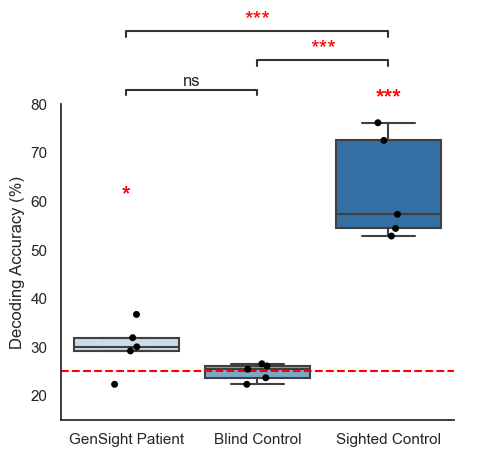

In [329]:
data=df[(df['Stimuli']=='All')]
data = pd.concat([df[(df['Stimuli']=='All') & (df['SubjectType']=='GenSight Patient') & (df['GogglesCondition']=='GogglesON')], df[(df['Stimuli']=='All') & (df['SubjectType']!='GenSight Patient')]],axis=0).reset_index()
data = data.groupby(['Subjid', 'SubjectType', 'GogglesCondition', 'Stimuli', 'ElecGroup', 'FreqGroup'], as_index=False).agg({'Accuracy': 'mean'})
plt.clf()
g = sns.catplot(data=data,kind='box',showfliers=False,
                x = 'SubjectType',y='Accuracy',
                palette='Blues',
                height=4,aspect=1.2
                )
g2 = sns.stripplot(data=data,
              x='SubjectType',y='Accuracy',
             # hue='Condition',
              color='k',
              )

# Define pairs of groups to compare
subject_types = data['SubjectType'].unique()
combinations_pairs = list(combinations(subject_types, 2))

# Add statistical annotations
_, test_results = add_stat_annotation(g2, data=data, x='SubjectType', y='Accuracy',
                    box_pairs=combinations_pairs,
                    test='t-test_ind', text_format='star', loc='outside', verbose=2,
                    pvalue_thresholds=[(1, "ns"),(0.1,"+"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
                    line_offset_to_box = 0.05)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['+', '*', '**', '***']):
        text.set_color('red')
        text.set_fontsize(16)

star_y = [60,70,80]
for i, subject_type in enumerate(subject_types):
    subset = data[data['SubjectType'] == subject_type]['Accuracy']
    t_stat, p_val = ttest_1samp(subset, 25, alternative='greater')
    
    # Determine significance level for annotation
    if p_val < 0.001:
        star = '***'
    elif p_val < 0.01:
        star = '**'
    elif p_val < 0.05:
        star = '*'
    else:
        star = ''
    
    # Print test result
    print(f"One-sample t-test for {subject_type}: t-statistic = {t_stat}, p-value = {p_val}")
    
    # Annotate the plot with the results
    g.ax.text(
        i, star_y[i], f"{star}", horizontalalignment='center', color='red', fontsize=16, fontweight='bold'
    )


# customize plot
plt.ylabel('Decoding Accuracy (%)', fontsize=12)
plt.ylim([15,80])
plt.xlabel('')
plt.axhline(y=25, color='red', linestyle='--')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.show()


p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
appr. sig (p<0.1): 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Disc_Blind Control v.s. Disc_Sighted Control: t-test independent samples with Bonferroni correction, P_val=9.934e-03 stat=-4.645e+00
HorizontalBar_GenSight Patient v.s. HorizontalBar_Blind Control: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.066e+00
HorizontalBar_Blind Control v.s. HorizontalBar_Sighted Control: t-test independent samples with Bonferroni correction, P_val=5.681e-04 stat=-7.176e+00
VerticalBar_GenSight Patient v.s. VerticalBar_Blind Control: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-3.329e-01
VerticalBar_Blind Control v.s. VerticalBar_Sighted Control: t-test independent samples with Bonferroni correction, P_val=1.185e-02 stat=-4.510e+00
Control_GenSight Patient v.s. Control_Blind Control: t-test independent samples with Bonferro

<Figure size 640x480 with 0 Axes>

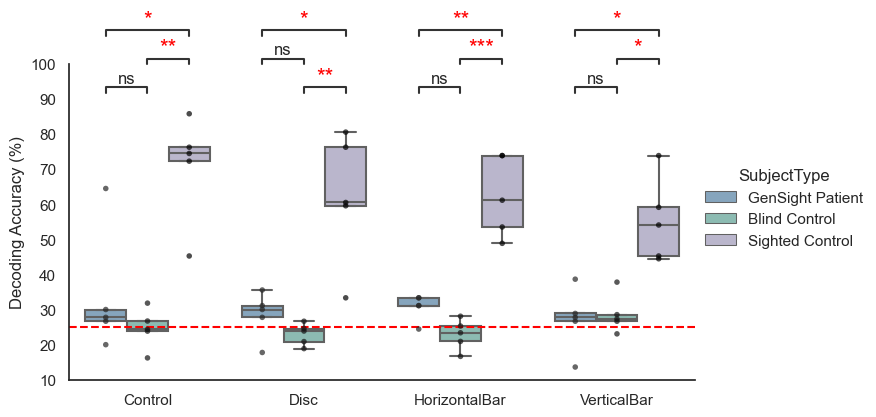

In [478]:
data=df[(df['Stimuli']!='All')]
data = pd.concat([
    df[(df['Stimuli']!='All') & (df['SubjectType']=='GenSight Patient') & (df['GogglesCondition']=='GogglesON')], 
    df[(df['Stimuli']!='All') & (df['SubjectType']!='GenSight Patient')]],
    axis=0).reset_index()
data = data.groupby(['Subjid', 'SubjectType', 'GogglesCondition', 'Stimuli', 'ElecGroup', 'FreqGroup'], as_index=False).agg({'Accuracy': 'mean'})

custom_palette = {
    'GenSight Patient': '#7da6c6',  # Blue
    'Blind Control': '#84c3b7',     # Light Blue
    'Sighted Control': '#b7b2d0'    # Light Gray
}



plt.clf()
g = sns.catplot(data=data,kind='box',showfliers=False,
                x = 'Stimuli',y='Accuracy',
                hue='SubjectType',dodge=True,
                palette=custom_palette,
                height=4,aspect=1.8
                )

sns.stripplot(
    data=data,
    x='Stimuli', y='Accuracy',
    hue='SubjectType', dodge=True,
    color='k',  # Match dot colors to box colors
    alpha=0.7, jitter=False, size=4,  # Adjust dot transparency, spread, and size
    ax=g.ax  # Add to the existing plot
)

pairs = [
    (('Control', 'GenSight Patient'), ('Control', 'Blind Control')),
    (('Control', 'GenSight Patient'), ('Control', 'Sighted Control')),
    (('Control', 'Blind Control'), ('Control', 'Sighted Control')),
    (('Disc', 'GenSight Patient'), ('Disc', 'Blind Control')),
    (('Disc', 'GenSight Patient'), ('Disc', 'Sighted Control')),
    (('Disc', 'Blind Control'), ('Disc', 'Sighted Control')),
    (('HorizontalBar', 'GenSight Patient'), ('HorizontalBar', 'Blind Control')),
    (('HorizontalBar', 'GenSight Patient'), ('HorizontalBar', 'Sighted Control')),
    (('HorizontalBar', 'Blind Control'), ('HorizontalBar', 'Sighted Control')),
    (('VerticalBar', 'GenSight Patient'), ('VerticalBar', 'Blind Control')),
    (('VerticalBar', 'GenSight Patient'), ('VerticalBar', 'Sighted Control')),
    (('VerticalBar', 'Blind Control'), ('VerticalBar', 'Sighted Control')),
]


# Add statistical annotations using one-tailed t-tests
add_stat_annotation(
    g.ax, data=data, x='Stimuli', y='Accuracy', hue='SubjectType',
    box_pairs=pairs,
    test='t-test_ind', text_format='star', loc='outside', verbose=2,
    pvalue_thresholds=[(1, "ns"),(0.1,"appr. sig (p<0.1)"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
    stats_params={'alternative': 'less'}
)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['*','**','(***)']):
        text.set_color('red')
        text.set_fontsize(16)


# Remove duplicate legends
# Keep only one legend by removing the one added by stripplot
g.ax.legend_.remove()
# customize plot
plt.ylabel('Decoding Accuracy (%)', fontsize=12)
plt.ylim([10,100])
plt.xlabel('')
plt.axhline(y=25, color='red', linestyle='--')
plt.show()
plt.show()

GenSight Patient
One-sample t-test for Control with GenSight Patient: t-statistic = 1.1187961268101636, p-value = 0.16293736039408485
Blind Control
One-sample t-test for Control with Blind Control: t-statistic = -0.15991031015507626, p-value = 0.559649033937118
Sighted Control
One-sample t-test for Control with Sighted Control: t-statistic = 6.746419574765372, p-value = 0.0012581980989106161
GenSight Patient
One-sample t-test for Disc with GenSight Patient: t-statistic = 1.1667003907172244, p-value = 0.15407210094505228
Blind Control
One-sample t-test for Disc with Blind Control: t-statistic = -1.4636788380343715, p-value = 0.8914383957224334
Sighted Control
One-sample t-test for Disc with Sighted Control: t-statistic = 4.464924699139179, p-value = 0.005559016472577462
GenSight Patient
One-sample t-test for HorizontalBar with GenSight Patient: t-statistic = 3.4701104689428353, p-value = 0.01279052257501797
Blind Control
One-sample t-test for HorizontalBar with Blind Control: t-statisti

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_81446/2046507203.py:71: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)


<Figure size 640x480 with 0 Axes>

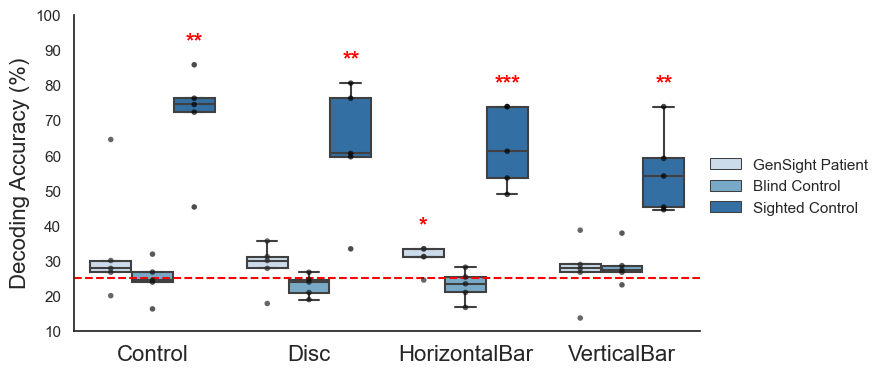

In [476]:
data=df[(df['Stimuli']!='All')]
data = pd.concat([
    df[(df['Stimuli']!='All') & (df['SubjectType']=='GenSight Patient') & (df['GogglesCondition']=='GogglesON')], 
    df[(df['Stimuli']!='All') & (df['SubjectType']!='GenSight Patient')]],
    axis=0).reset_index()
data = data.groupby(['Subjid', 'SubjectType', 'GogglesCondition', 'Stimuli', 'ElecGroup', 'FreqGroup'], as_index=False).agg({'Accuracy': 'mean'})

custom_palette = {
    'GenSight Patient': '#2066a8',  # Blue
    'Blind Control': '#3594cc',     # Light Blue
    'Sighted Control': '#8cc5e3'    # Light Gray
}



plt.clf()
g = sns.catplot(data=data,kind='box',showfliers=False,
                x = 'Stimuli',y='Accuracy',
                hue='SubjectType',dodge=True,
                palette='Blues',
                height=4,aspect=1.8
                )

sns.stripplot(
    data=data,
    x='Stimuli', y='Accuracy',
    hue='SubjectType', dodge=True,
    color='k',  # Match dot colors to box colors
    alpha=0.7, jitter=False, size=4,  # Adjust dot transparency, spread, and size
    ax=g.ax  # Add to the existing plot
)

# Perform one-sample t-tests against the value 25 for each condition and annotate the plot
conditions = data['Stimuli'].unique()
SubjectType = ['GenSight Patient', 'Blind Control', 'Sighted Control']

for i, condition in enumerate(conditions):
    for j, subject in enumerate(SubjectType):
        subset = data[(data['Stimuli'] == condition) & (data['SubjectType'] == subject)]['Accuracy']
        t_stat, p_val = ttest_1samp(subset, 25, alternative='greater')
        print(subject)
        
        # Determine significance level for annotation
        if p_val < 0.001:
            star = '***'
        elif p_val < 0.01:
            star = '**'
        elif p_val < 0.05:
            star = '*'
        elif p_val < 0.1:
            star = '+'
        else:
            star = 'ns'  # No annotation for non-significant results
        
        # Print test result
        print(f"One-sample t-test for {condition} with {subject}: t-statistic = {t_stat}, p-value = {p_val}")
        
        # Annotate the plot with the results
        if star != 'ns':  # Only annotate if there is a significant result
            x_pos = i+(j-1)*0.27 # Align with box positions based on dodge
            y_pos = subset.max() + 5  # Position above the highest data point
            g.ax.text(
                x_pos, y_pos, f"{star}",
                horizontalalignment='center', color='red', fontsize=16, fontweight='bold'
            )


# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
g._legend.set_title('')

# customize plot
plt.ylabel('Decoding Accuracy (%)', fontsize=16)
plt.xticks(fontsize=16)
plt.ylim([10,100])
plt.xlabel('')
plt.axhline(y=25, color='red', linestyle='--')
plt.show()

In [411]:
pairs

[('Control', ('GenSight Patient', 'Blind Control')),
 ('Control', ('GenSight Patient', 'Sighted Control')),
 ('Control', ('Blind Control', 'Sighted Control')),
 ('Disc', ('GenSight Patient', 'Blind Control')),
 ('Disc', ('GenSight Patient', 'Sighted Control')),
 ('Disc', ('Blind Control', 'Sighted Control')),
 ('HorizontalBar', ('GenSight Patient', 'Blind Control')),
 ('HorizontalBar', ('GenSight Patient', 'Sighted Control')),
 ('HorizontalBar', ('Blind Control', 'Sighted Control')),
 ('VerticalBar', ('GenSight Patient', 'Blind Control')),
 ('VerticalBar', ('GenSight Patient', 'Sighted Control')),
 ('VerticalBar', ('Blind Control', 'Sighted Control'))]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
+: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Blind Control v.s. Sighted Control: t-test independent samples with Bonferroni correction, P_val=5.859e-05 stat=-7.679e+00
One-sample t-test for Blind Control: t-statistic = -0.27482602934674133, p-value = 0.6014696012123599
One-sample t-test for Sighted Control: t-statistic = 7.734991821537107, p-value = 0.0007522730272966225


<Figure size 640x480 with 0 Axes>

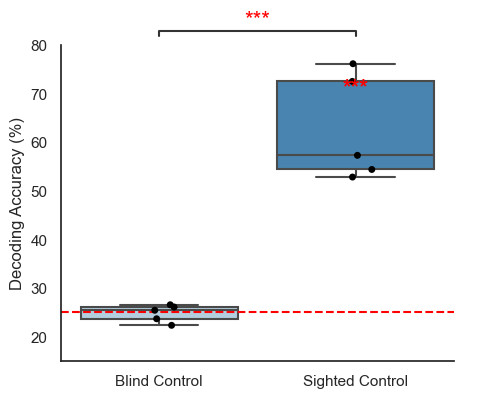

In [330]:
data=df[(df['Stimuli']=='All')]
data = pd.concat([df[(df['Stimuli']=='All') & (df['SubjectType']=='GenSight Patient') & (df['GogglesCondition']=='GogglesON/12Hz')], df[(df['Stimuli']=='All') & (df['SubjectType']!='GenSight Patient')]],axis=0).reset_index()
data = data[(data['Subjid']!=1004)]
data = data.groupby(['Subjid', 'SubjectType', 'GogglesCondition', 'Stimuli', 'ElecGroup', 'FreqGroup'], as_index=False).agg({'Accuracy': 'mean'})
plt.clf()
g = sns.catplot(data=data,kind='box',showfliers=False,
                x = 'SubjectType',y='Accuracy',
                palette='Blues',
                height=4,aspect=1.2
                )
g2 = sns.stripplot(data=data,
              x='SubjectType',y='Accuracy',
             # hue='Condition',
              color='k',
              )

# Define pairs of groups to compare
subject_types = data['SubjectType'].unique()
combinations_pairs = list(combinations(subject_types, 2))

# Add statistical annotations
_, test_results = add_stat_annotation(g2, data=data, x='SubjectType', y='Accuracy',
                    box_pairs=combinations_pairs,
                    test='t-test_ind', text_format='star', loc='outside', verbose=2,
                    pvalue_thresholds=[(1, "ns"),(0.1,"+"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
                    line_offset_to_box = 0.05)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['+', '*', '**', '***']):
        text.set_color('red')
        text.set_fontsize(16)

star_y = [60,70,80]
for i, subject_type in enumerate(subject_types):
    subset = data[data['SubjectType'] == subject_type]['Accuracy']
    t_stat, p_val = ttest_1samp(subset, 25, alternative='greater')
    
    # Determine significance level for annotation
    if p_val < 0.001:
        star = '***'
    elif p_val < 0.01:
        star = '**'
    elif p_val < 0.05:
        star = '*'
    else:
        star = ''
    
    # Print test result
    print(f"One-sample t-test for {subject_type}: t-statistic = {t_stat}, p-value = {p_val}")
    
    # Annotate the plot with the results
    g.ax.text(
        i, star_y[i], f"{star}", horizontalalignment='center', color='red', fontsize=16, fontweight='bold'
    )


# customize plot
plt.ylabel('Decoding Accuracy (%)', fontsize=12)
plt.ylim([15,80])
plt.xlabel('')
plt.axhline(y=25, color='red', linestyle='--')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.show()


In [317]:
data1

,Subjid,Stimuli,GogglesCondition,Accuracy
0,1001,Control,GogglesON,40.555556
1,1001,Disc,GogglesOFF,27.777778
2,1001,Disc,GogglesON,31.111111
3,1001,HorizontalBar,GogglesOFF,33.333333
4,1001,HorizontalBar,GogglesON,24.444444
5,1001,VerticalBar,GogglesOFF,22.222222
6,1001,VerticalBar,GogglesON,26.666667
7,1002,Control,GogglesOFF,7.142857
8,1002,Control,GogglesON,20.000000
9,1002,Disc,GogglesOFF,20.454545


/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_81446/3897598088.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = data1.groupby(['Subjid','Stimuli','GogglesCondition']).mean().reset_index()
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1154: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)


p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
appr. sig (p<0.1): 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Disc_GogglesOFF v.s. Disc_GogglesON: t-test paired samples with Bonferroni correction, P_val=2.985e-02 stat=-4.094e+00
Control_GogglesOFF v.s. Control_GogglesON: t-test paired samples with Bonferroni correction, P_val=1.948e-01 stat=-2.155e+00
HorizontalBar_GogglesOFF v.s. HorizontalBar_GogglesON: t-test paired samples with Bonferroni correction, P_val=5.916e-01 stat=-1.202e+00
VerticalBar_GogglesOFF v.s. VerticalBar_GogglesON: t-test paired samples with Bonferroni correction, P_val=6.943e-01 stat=-1.064e+00
One-sample t-test for Control with GogglesON: t-statistic = 1.1187961268101636, p-value = 0.16293736039408485
One-sample t-test for Control with GogglesOFF: t-statistic = -3.052677907642102, p-value = 0.98103559739019
One-sample t-test for Disc with GogglesON: t-statistic = 1.1667003907172244, p-value = 0.15

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_81446/3897598088.py:116: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = data2.groupby(['Subjid','Stimuli','GogglesCondition']).mean().reset_index()
/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_81446/3897598088.py:153: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data3 = data3.groupby(['Subjid','Stimuli','GogglesCondition']).mean().reset_index()
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:1154: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('2').  Matpl

One-sample t-test for Control: t-statistic = 6.746419574765372, p-value = 0.0012581980989106161
One-sample t-test for Disc: t-statistic = 4.464924699139179, p-value = 0.005559016472577462
One-sample t-test for HorizontalBar: t-statistic = 7.261463275368721, p-value = 0.000955031416956702
One-sample t-test for VerticalBar: t-statistic = 5.6433110792481225, p-value = 0.002427350777346175


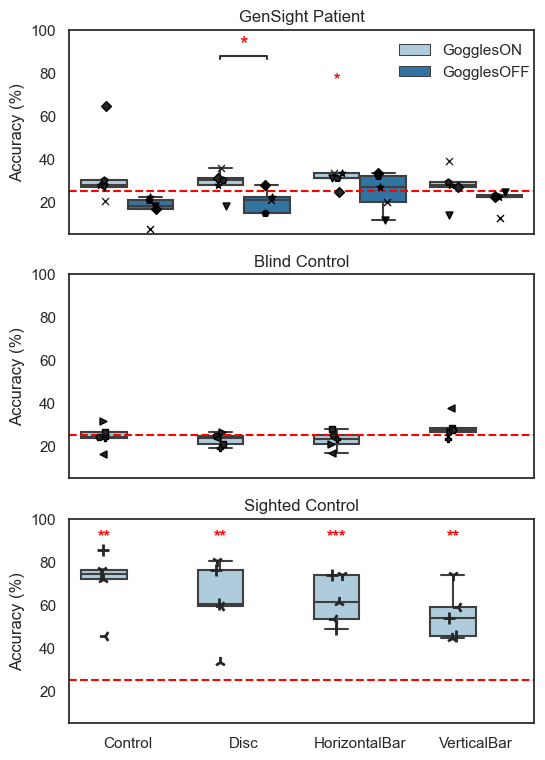

In [339]:
# Close any existing plots
plt.close()

# Prepare the subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 9), sharex=True)

# First plot
data1 = df[(df['Stimuli'] != 'All') & (df['HasOffData'] == 'Yes') & (df['SubjectType']=='GenSight Patient')]
data1 = data1.groupby(['Subjid','Stimuli','GogglesCondition']).mean().reset_index()

# Create the boxplot
sns.boxplot(
    data=data1, showfliers=False,
    y='Accuracy', x='Stimuli',
    order=['Control', 'Disc', 'HorizontalBar', 'VerticalBar'],
    hue='GogglesCondition', hue_order=['GogglesON', 'GogglesOFF'],
    palette='Paired',
    ax = axes[0]
)

# Define custom markers for each subject
unique_subjects = data1['Subjid'].unique()
markers = ['D', 'x', 'v', '*', 'p', 'h', 'H', '*', '+', 'x', 'd', '|', '_']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

# Overlay each subject with its custom marker
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data1[data1['Subjid'] == subject],
        y='Accuracy', x='Stimuli',
        order=['Control', 'Disc', 'HorizontalBar', 'VerticalBar'],
        hue='GogglesCondition', hue_order=['GogglesON', 'GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True, ax=axes[0]
    )

# Remove the additional legends created by stripplot
handles, labels = axes[0].get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
axes[0].legend(handles[0:2],labels[0:2], title='', bbox_to_anchor=(0.85, 1), loc='upper center', frameon=False)

# Define pairs for statistical comparison
pairs = [
    (('Control', 'GogglesON'), ('Control', 'GogglesOFF')),
    (('Disc', 'GogglesON'), ('Disc', 'GogglesOFF')),
    (('VerticalBar', 'GogglesON'), ('VerticalBar', 'GogglesOFF')),
    (('HorizontalBar', 'GogglesON'), ('HorizontalBar', 'GogglesOFF')),
]

# Add statistical annotations using one-tailed t-tests
add_stat_annotation(
    ax=axes[0], data=data1, x='Stimuli', y='Accuracy', hue='GogglesCondition',
    box_pairs=pairs,
    test='t-test_paired', text_format='star', loc='outside', verbose=2,
    pvalue_thresholds=[(1, "ns"),(0.1,"appr. sig (p<0.1)"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
    stats_params={'alternative': 'less'},
    line_offset_to_box = 0.28
)

for text in axes[0].texts:
    if any(star in text.get_text() for star in ['*','**','(***)']):
        text.set_color('red')
        text.set_fontsize(16)

for text in axes[0].texts:
    if text.get_text() == 'ns':  # Check if the annotation is 'ns'
        x, y = text.get_position()  # Get the position of the text annotation
        text.set_visible(False)  # Hide the 'ns' text

        # Find the corresponding line (bracket) based on its y-position
for line in axes[0].lines:
    y = line.get_ydata()
    x = line.get_xdata()
    if y[0] > 60 and (x[0] > 1 or x[0] < 0.5): # Match the y-coordinate of the annotation to the bracket
        line.set_visible(False)

# Perform one-sample t-tests against the value 25 for each condition and annotate the plot
conditions = data1['Stimuli'].unique()
goggles_conditions = ['GogglesON', 'GogglesOFF']

for i, condition in enumerate(conditions):
    for j, goggles in enumerate(goggles_conditions):
        subset = data1[(data1['Stimuli'] == condition) & (data1['GogglesCondition'] == goggles)]['Accuracy']
        t_stat, p_val = ttest_1samp(subset, 25, alternative='greater')
        
        # Determine significance level for annotation
        if p_val < 0.001:
            star = '***'
        elif p_val < 0.01:
            star = '**'
        elif p_val < 0.05:
            star = '*'
        elif p_val < 0.1:
            star = '+'
        else:
            star = 'ns'  # No annotation for non-significant results
        
        # Print test result
        print(f"One-sample t-test for {condition} with {goggles}: t-statistic = {t_stat}, p-value = {p_val}")
        
        # Annotate the plot with the results
        if star != 'ns':  # Only annotate if there is a significant result
            axes[0].text(
                i-0.2, 75, f"{star}", horizontalalignment='center', color='red', fontsize=12, fontweight='bold'
            )

# Customize plot
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_xlabel('')
axes[0].axhline(y=25, color='red', linestyle='--')
axes[0].set_ylim([5,100])
axes[0].set_title('GenSight Patient')


# Second plot
data2 = df[(df['Stimuli'] != 'All') & (df['SubjectType']=='Blind Control')]
data2 = data2.groupby(['Subjid','Stimuli','GogglesCondition']).mean().reset_index()

# Create the boxplot
sns.boxplot(
    data=data2, showfliers=False,
    y='Accuracy', x='Stimuli',                
    order=['Control','Disc','HorizontalBar','VerticalBar'],
    hue='GogglesCondition', hue_order=['NotApplicable', 'GogglesOFF'],
    palette='Paired',
    ax=axes[1]
)

# Define custom markers for each subject
unique_subjects = data2['Subjid'].unique()
markers = ['>', 's', 'H','P', '<']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

# Overlay each subject with its custom marker
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data2[data2['Subjid'] == subject],
        y='Accuracy', x='Stimuli',                
        order=['Control','Disc','HorizontalBar','VerticalBar'],
        hue='GogglesCondition', hue_order=['NotApplicable', 'GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True, ax=axes[1]
    )

# Customize plot 
axes[1].legend_.remove()
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_xlabel('')
axes[1].axhline(y=25, color='red', linestyle='--')
axes[1].set_ylim([5,100])
axes[1].set_title('Blind Control')

# Third plot
data3 = df[(df['Stimuli'] != 'All') & (df['SubjectType']=='Sighted Control')]
data3 = data3.groupby(['Subjid','Stimuli','GogglesCondition']).mean().reset_index()

# Create the boxplot
sns.boxplot(
    data=data3, showfliers=False,
    y='Accuracy', x='Stimuli',                
    order=['Control','Disc','HorizontalBar','VerticalBar'],
    hue='GogglesCondition', hue_order=['NotApplicable', 'GogglesOFF'],
    palette='Paired',
    ax=axes[2]
)

# Define custom markers for each subject
unique_subjects = data3['Subjid'].unique()
markers = ['2', '3', '1', '+', '|']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

# Overlay each subject with its custom marker
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data3[data3['Subjid'] == subject],
        y='Accuracy', x='Stimuli',                
        order=['Control','Disc','HorizontalBar','VerticalBar'],
        hue='GogglesCondition', hue_order=['NotApplicable', 'GogglesOFF'],
        marker=marker, color='none', edgecolor='gray', linewidth=2, dodge=True, size=8, ax=axes[2]
    )

# add stats annotations
conditions = ['Control','Disc','HorizontalBar','VerticalBar']
for i, condition in enumerate(conditions):
    subset = data3[data3['Stimuli'] == condition]['Accuracy']
    t_stat, p_val = ttest_1samp(subset, 25, alternative='greater')
    
    # Determine significance level for annotation
    if p_val < 0.001:
        star = '***'
    elif p_val < 0.01:
        star = '**'
    elif p_val < 0.05:
        star = '*'
    else:
        star = ''
    
    # Print test result
    print(f"One-sample t-test for {condition}: t-statistic = {t_stat}, p-value = {p_val}")
    
    # Annotate the plot with the results
    axes[2].text(
        i-0.2, 90, f"{star}", horizontalalignment='center', color='red', fontsize=12, fontweight='bold'
    )

# Customize plot 
axes[2].legend_.remove()
axes[2].set_ylabel('Accuracy (%)', fontsize=12)
axes[2].set_xlabel('')
axes[2].axhline(y=25, color='red', linestyle='--')
axes[2].set_ylim([5,100])
axes[2].set_title('Sighted Control')


plt.show()


In [218]:
data1

,Subjid,SubjectType,Condition,GogglesCondition,Stimuli,ElecGroup,FreqGroup,HasOffData,Accuracy
1,1001,GenSight Patient,3Hz,GogglesOFF,Disc,All_electrodes,1to40,Yes,27.777778
2,1001,GenSight Patient,3Hz,GogglesOFF,HorizontalBar,All_electrodes,1to40,Yes,33.333333
3,1001,GenSight Patient,3Hz,GogglesOFF,VerticalBar,All_electrodes,1to40,Yes,22.222222
4,1001,GenSight Patient,3Hz,GogglesON,Control,All_electrodes,1to40,Yes,16.666667
6,1001,GenSight Patient,6Hz,GogglesON,Control,All_electrodes,1to40,Yes,64.444444
7,1001,GenSight Patient,6Hz,GogglesON,Disc,All_electrodes,1to40,Yes,31.111111
8,1001,GenSight Patient,6Hz,GogglesON,HorizontalBar,All_electrodes,1to40,Yes,24.444444
9,1001,GenSight Patient,6Hz,GogglesON,VerticalBar,All_electrodes,1to40,Yes,26.666667
11,1002,GenSight Patient,3Hz,GogglesOFF,Control,All_electrodes,1to40,Yes,7.142857
12,1002,GenSight Patient,3Hz,GogglesOFF,Disc,All_electrodes,1to40,Yes,20.454545


In [19]:
test = data.groupby(['Subjid', 'SubjectType', 'GogglesCondition', 'Stimuli', 'ElecGroup', 'FreqGroup'], as_index=False).agg({'Accuracy': 'mean'})
test

,Subjid,SubjectType,GogglesCondition,Stimuli,ElecGroup,FreqGroup,Accuracy
0,1001,GenSight Patient,GogglesON/12Hz,All,All_electrodes,1to40,36.666667
1,1002,GenSight Patient,GogglesON/12Hz,All,All_electrodes,1to40,31.881313
2,4006,GenSight Patient,GogglesON/12Hz,All,All_electrodes,1to40,29.166667
3,4010,GenSight Patient,GogglesON/12Hz,All,All_electrodes,1to40,30.000000
4,BCP001,Blind Control,NotApplicable,All,All_electrodes,1to40,26.520437
5,BCP002,Blind Control,NotApplicable,All,All_electrodes,1to40,26.062313
6,BCP003,Blind Control,NotApplicable,All,All_electrodes,1to40,25.390855
7,BCP004,Blind Control,NotApplicable,All,All_electrodes,1to40,22.295584
8,BCP005,Blind Control,NotApplicable,All,All_electrodes,1to40,23.644064
9,HCP001,Sighted Control,NotApplicable,All,All_electrodes,1to40,52.777778


In [14]:
data

,index,Subjid,SubjectType,Condition,GogglesCondition,Stimuli,ElecGroup,FreqGroup,Accuracy
0,5,1001,GenSight Patient,6Hz,GogglesON/12Hz,All,All_electrodes,1to40,36.666667
1,15,1002,GenSight Patient,6Hz,GogglesON/12Hz,All,All_electrodes,1to40,31.881313
2,20,1004,GenSight Patient,6Hz,GogglesON/12Hz,All,All_electrodes,1to40,22.297980
3,25,4006,GenSight Patient,12Hz,GogglesON/12Hz,All,All_electrodes,1to40,29.166667
4,35,4010,GenSight Patient,12Hz,GogglesON/12Hz,All,All_electrodes,1to40,30.000000
5,45,BCP001,Blind Control,6Hz,NotApplicable,All,All_electrodes,1to40,26.520437
6,50,BCP002,Blind Control,12Hz,NotApplicable,All,All_electrodes,1to40,27.134269
7,55,BCP002,Blind Control,6Hz,NotApplicable,All,All_electrodes,1to40,24.990357
8,60,BCP003,Blind Control,12Hz,NotApplicable,All,All_electrodes,1to40,29.758919
9,65,BCP003,Blind Control,6Hz,NotApplicable,All,All_electrodes,1to40,21.022792


In [61]:
data = data[data['SubjectType']!='Sighted Control']
data

,index,Subjid,SubjectType,Condition,GogglesCondition,Stimuli,ElecGroup,FreqGroup,Accuracy
0,5,1001,GenSight Patient,6Hz,GogglesON/12Hz,All,All_electrodes,1to40,36.666667
1,15,1002,GenSight Patient,6Hz,GogglesON/12Hz,All,All_electrodes,1to40,31.881313
2,20,1004,GenSight Patient,6Hz,GogglesON/12Hz,All,All_electrodes,1to40,22.297980
3,25,4006,GenSight Patient,12Hz,GogglesON/12Hz,All,All_electrodes,1to40,29.166667
4,35,4010,GenSight Patient,12Hz,GogglesON/12Hz,All,All_electrodes,1to40,30.000000
5,45,BCP001,Blind Control,6Hz,NotApplicable,All,All_electrodes,1to40,26.520437
6,50,BCP002,Blind Control,12Hz,NotApplicable,All,All_electrodes,1to40,27.134269
7,55,BCP002,Blind Control,6Hz,NotApplicable,All,All_electrodes,1to40,24.990357
8,60,BCP003,Blind Control,12Hz,NotApplicable,All,All_electrodes,1to40,29.758919
9,65,BCP003,Blind Control,6Hz,NotApplicable,All,All_electrodes,1to40,21.022792


In [62]:
ttest_ind(data[data['Condition']=='6Hz']['Accuracy'],data[data['Condition']=='12Hz']['Accuracy'])

TtestResult(statistic=-0.3522264611448469, pvalue=0.7307768902871901, df=12.0)

In [63]:
data.groupby('SubjectType').std()

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_79544/2767146802.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('SubjectType').std()


,index,Accuracy
SubjectType,,
Blind Control,13.693064,3.150949
GenSight Patient,11.180340,5.196136


In [64]:
combinations_pairs

[('GenSight Patient', 'Blind Control'),
 ('GenSight Patient', 'Sighted Control'),
 ('Blind Control', 'Sighted Control')]

/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


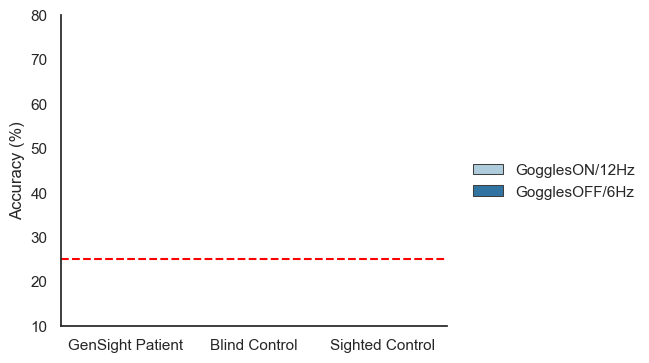

In [65]:
data=df[(df['Stimuli']=='All')]
g = sns.catplot(data=data,kind='box',
            y='Accuracy',x='SubjectType',showfliers=False,
            hue='Condition',hue_order=['GogglesON/12Hz','GogglesOFF/6Hz'],
            errorbar=None,
            palette='Paired',
            height=4, aspect=1.2
            )
g.map_dataframe(sns.stripplot,
            y='Accuracy',x='SubjectType',
            hue='Condition',hue_order=['GogglesON/12Hz','GogglesOFF/6Hz'],
            palette='dark:k',dodge=True)
g.set(ylim=[10,80])
#g.set(yticks=[15,20,25,30,35,40])
g.refline(y=25,color='red')
g.set_ylabels('Accuracy (%)',fontsize=12)
g.set_xlabels('')

sns.move_legend(g, "center right")
g._legend.set_title('')
plt.show()

In [66]:
data

,Subjid,SubjectType,Condition,GogglesCondition,Stimuli,ElecGroup,FreqGroup,Accuracy
0,1001,GenSight Patient,3Hz,GogglesOFF/6Hz,All,All_electrodes,1to40,25.000000
5,1001,GenSight Patient,6Hz,GogglesON/12Hz,All,All_electrodes,1to40,36.666667
10,1002,GenSight Patient,3Hz,GogglesOFF/6Hz,All,All_electrodes,1to40,14.826180
15,1002,GenSight Patient,6Hz,GogglesON/12Hz,All,All_electrodes,1to40,31.881313
20,1004,GenSight Patient,6Hz,GogglesON/12Hz,All,All_electrodes,1to40,22.297980
25,4006,GenSight Patient,12Hz,GogglesON/12Hz,All,All_electrodes,1to40,29.166667
30,4006,GenSight Patient,6Hz,GogglesOFF/6Hz,All,All_electrodes,1to40,23.333333
35,4010,GenSight Patient,12Hz,GogglesON/12Hz,All,All_electrodes,1to40,30.000000
40,4010,GenSight Patient,6Hz,GogglesOFF/6Hz,All,All_electrodes,1to40,22.588988
45,BCP001,Blind Control,6Hz,NotApplicable,All,All_electrodes,1to40,26.520437


In [67]:
ttest_ind(data[(data['SubjectType']=='GenSight Patient') & (data['Condition']=='GogglesON/12Hz')]['Accuracy'],data[(data['SubjectType']=='Blind Control') & (data['Condition']=='GogglesON/12Hz')]['Accuracy'])

TtestResult(statistic=nan, pvalue=nan, df=nan)

/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


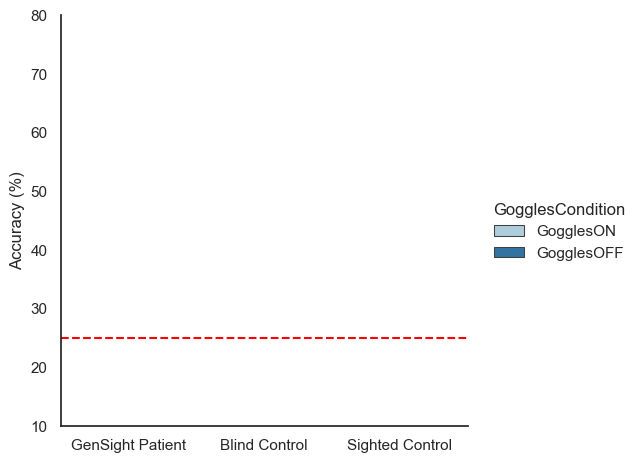

In [68]:
data=df[(df['Stimuli']=='All')]
g = sns.catplot(data=data,kind='box',showfliers=False,
            y='Accuracy',x='SubjectType',
            hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            errorbar=None,
            palette='Paired',
            )
g.map_dataframe(sns.stripplot,
                y='Accuracy',x='SubjectType',
            hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
            color='k',dodge=True)
g.set(ylim=[10,80])
#g.set(yticks=[15,20,25,30,35,40])
g.refline(y=25,color='red')
g.set_ylabels('Accuracy (%)',fontsize=12)
g.set_xlabels('')
plt.show()

In [15]:
data=pd.concat([df[(df['GogglesCondition']=='GogglesON') & (df['SubjectType']=='GenSight Patient')], df[df['SubjectType']!='Gensight Patient']],axis=0).reset_index()
data = data[data['Stimuli']!='All']
data

KeyError: 'GogglesCondition'

In [3]:

g = sns.FacetGrid(data=data,col='SubjectType')
g.map_dataframe(sns.boxplot,showfliers=False,
                  x='Stimuli',y='Accuracy',
                  hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
                  palette='Paired',legend=True)
g.add_legend()
g.map_dataframe(sns.stripplot,
                  x='Stimuli',y='Accuracy',
                  hue='GogglesCondition',hue_order=['GogglesON','GogglesOFF'],
                  palette='dark:k',dodge=True)
g.refline(y=25,color='red')
g.set_xlabels('')
g.set_ylabels('Accuracy (%)')
g.set_xticklabels(rotation=25)
g.set_titles(col_template = '{col_name}')


NameError: name 'data' is not defined

In [26]:
df = pd.read_csv('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/VEPTask/Results/AllSub_results_OcciAlpha.csv')
data = df.groupby(['Subjid','SubjectType']).mean().reset_index()
data

,Subjid,SubjectType,occi_alpha
0,BCP001,Blind Control,-0.044875
1,BCP002,Blind Control,-0.059587
2,BCP003,Blind Control,-0.042055
3,BCP004,Blind Control,-0.189695
4,BCP005,Blind Control,-0.265822
5,HCP001,Sighted Control,0.751738
6,HCP002,Sighted Control,-0.038188
7,HCP003,Sighted Control,-0.041777
8,HCP004,Sighted Control,0.742530
9,HCP005,Sighted Control,0.246813


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
+: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Sighted Control v.s. Blind Control: t-test independent samples with Bonferroni correction, P_val=1.764e-02 stat=3.341e+00
Blind Control v.s. GenSight Patient: t-test independent samples with Bonferroni correction, P_val=2.686e-02 stat=-3.033e+00
Sighted Control v.s. GenSight Patient: t-test independent samples with Bonferroni correction, P_val=1.895e-01 stat=2.090e+00


<Figure size 640x480 with 0 Axes>

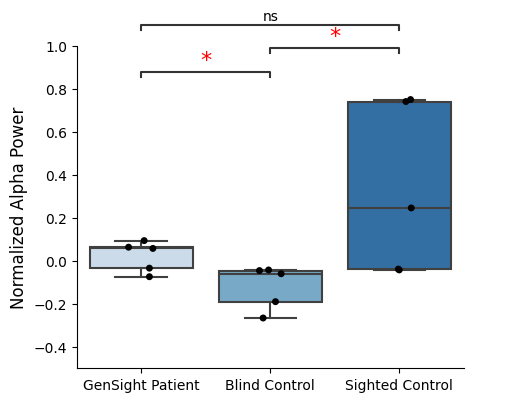

In [31]:
plt.clf()
g = sns.catplot(data=data,kind='box',showfliers=False,
                x = 'SubjectType',y='occi_alpha',
                palette='Blues',order=['GenSight Patient','Blind Control','Sighted Control'],
                height=4,aspect=1.2
                )
g2 = sns.stripplot(data=data,
              x='SubjectType',y='occi_alpha',order=['GenSight Patient','Blind Control','Sighted Control'],
             # hue='Condition',
              color='k',
              )

# Define pairs of groups to compare
subject_types = data['SubjectType'].unique()
combinations_pairs = list(combinations(subject_types, 2))

# Add statistical annotations
_, test_results = add_stat_annotation(g2, data=df, x='SubjectType', y='occi_alpha',
                    box_pairs=combinations_pairs,
                    test='t-test_ind', text_format='star', loc='outside', verbose=2,
                    pvalue_thresholds=[(1, "ns"),(0.1,"+"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
                    line_offset_to_box = 0.05)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['+', '*', '**', '***']):
        text.set_color('red')
        text.set_fontsize(16)

# customize plot
plt.ylabel('Normalized Alpha Power', fontsize=12)
plt.ylim([-0.5,1])
plt.xlabel('')
plt.axhline(y=25, color='red', linestyle='--')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.show()
g.savefig('/Users/shouyuling/Downloads/OcciAlpha.png', format='png', dpi=1200)

In [3]:
df = pd.read_csv('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/VEPTask/Results/AllSub_results_FrontAlpha.csv')
data = df.groupby(['Subjid','SubjectType']).mean().reset_index()
data

,Subjid,SubjectType,front_alpha
0,BCP001,Blind Control,-0.111463
1,BCP002,Blind Control,-0.020886
2,BCP003,Blind Control,-0.084638
3,BCP004,Blind Control,-0.208804
4,BCP005,Blind Control,-0.354984
5,HCP001,Sighted Control,0.568659
6,HCP002,Sighted Control,-0.059232
7,HCP003,Sighted Control,-0.005352
8,HCP004,Sighted Control,0.306085
9,HCP005,Sighted Control,-0.224771


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 1.00e-01 < p <= 1.00e+00
+: 5.00e-02 < p <= 1.00e-01
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: p <= 1.00e-03

Sighted Control v.s. Blind Control: t-test independent samples with Bonferroni correction, P_val=2.108e-01 stat=1.987e+00
Blind Control v.s. GenSight Patient: t-test independent samples with Bonferroni correction, P_val=2.063e-01 stat=-1.971e+00
Sighted Control v.s. GenSight Patient: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=8.975e-01


<Figure size 640x480 with 0 Axes>

<Figure size 2600x1200 with 0 Axes>

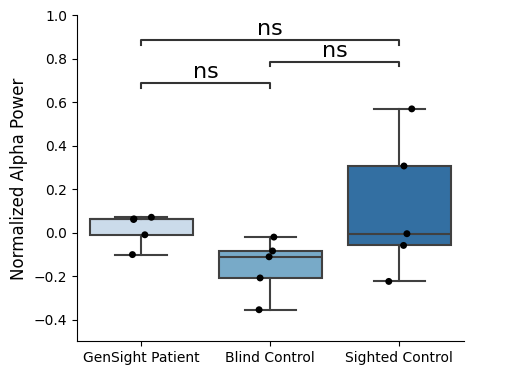

In [25]:
plt.clf()
plt.figure(figsize=(26,12))
g = sns.catplot(data=data,kind='box',showfliers=False,
                x = 'SubjectType',y='front_alpha',
                palette='Blues',order=['GenSight Patient','Blind Control','Sighted Control'],
                height=4,aspect=1.2
                )
g2 = sns.stripplot(data=data,
              x='SubjectType',y='front_alpha',order=['GenSight Patient','Blind Control','Sighted Control'],
             # hue='Condition',
              color='k'
              )

# Define pairs of groups to compare
subject_types = data['SubjectType'].unique()
combinations_pairs = list(combinations(subject_types, 2))

# Add statistical annotations
_, test_results = add_stat_annotation(g2, data=df, x='SubjectType', y='front_alpha',
                    box_pairs=combinations_pairs,
                    test='t-test_ind', text_format='star', loc='outside', verbose=2,
                    pvalue_thresholds=[(1, "ns"),(0.1,"+"), (0.05, "*"), (0.01, "**"), (0.001, "***")],
                    line_offset_to_box = 0.05)

for text in g.ax.texts:
    if any(star in text.get_text() for star in ['+', '*', '**', '***']):
        text.set_color('red')
        text.set_fontsize(16)
    if any(star in text.get_text() for star in ['ns']):
        text.set_fontsize(16)


# customize plot
plt.ylabel('Normalized Alpha Power', fontsize=12)
plt.ylim([-0.5,1])
plt.xlabel('')
plt.axhline(y=25, color='red', linestyle='--')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.show()
g.savefig('/Users/shouyuling/Downloads/FrontAlpha.png', format='png', dpi=1200)